In [1]:
from matplotlib.pyplot import scatter
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [8]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

In [10]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file='iris_tree.dot', feature_names=['petal length (cm)', 'petal width (cm)'],
                class_names=iris.target_names, filled=True, rounded=True)

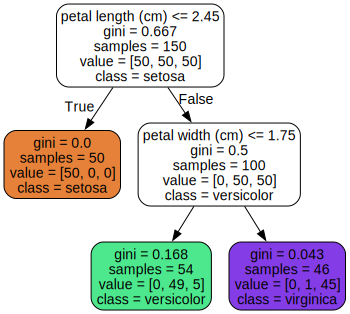

In [13]:
from graphviz import Source

Source.from_file('iris_tree.dot')

Scikit-Learn uses the CART algorithm which produces only binary trees, thus trees will always have two children when using this (easiest to understand). You can also use ID3, which can produce decision trees with nodes that have more than two children.

CART algorithm is a greedy algorithm to split at the top level, then repeats for each subsequent level. This does **NOT** check whetheror not the split will lead to the lowest possible impurity several levels down.

The computational complexity of this algorithm is basically O(log_2(m)) nodes, where log_2(m) is the binary logarithm of m i.e. log(m) / log(2)

In [14]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [15]:
tree_clf.predict([[5, 1.5]])

array([1])

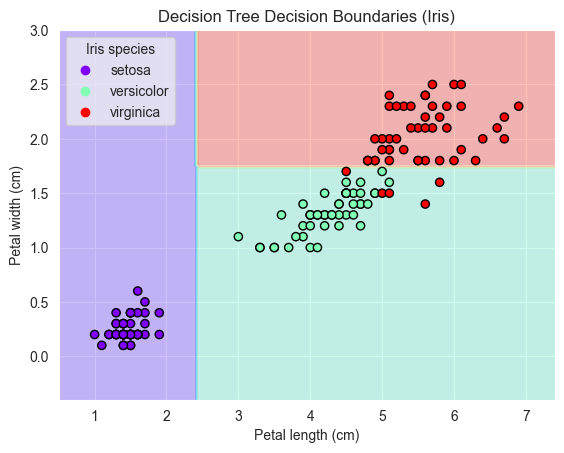

In [27]:
import numpy as np
import matplotlib.pyplot as plt

class_names = iris.target_names

x1s = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
x2s = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_grid).reshape(x1.shape)

plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.rainbow)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, edgecolor="k", s=35)

# Add labels and legend
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Tree Decision Boundaries (Iris)")

# Create legend mapping colors to class names
handles, _ = scatter.legend_elements()
plt.legend(handles, class_names, title="Iris species")

plt.show()

To avoid overfitting, you need to restrict the decision tree's freedom during training - regularisation. One of these is the 'max_depth' parameter. Can also prune the tree by allowing it to be unrestricted then removing any unnecessary nodes.

In [16]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, random_state=42, noise=0.2)

In [18]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
X_moon_test, y_moon_test = make_moons(n_samples=1000, random_state=43, noise=0.2)

In [20]:
tree_clf1.score(X_moon_test, y_moon_test)

0.898

In [21]:
tree_clf2.score(X_moon_test, y_moon_test)

0.92

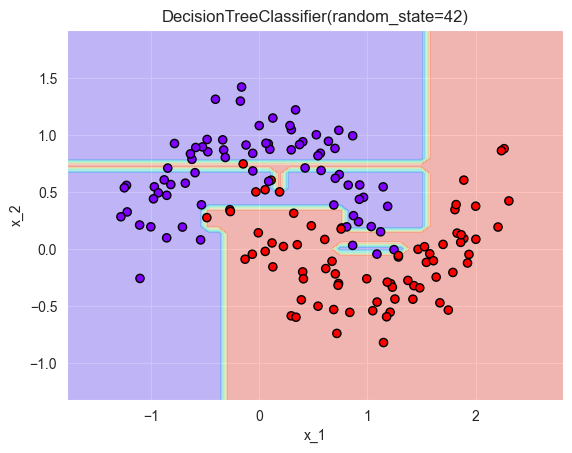

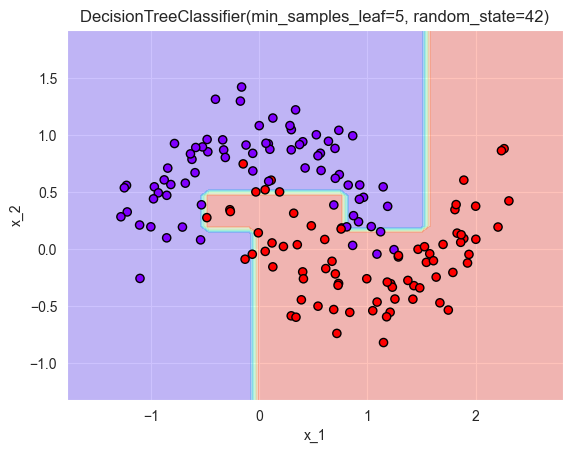

In [33]:
for model in [tree_clf1, tree_clf2]:
    x1s = np.linspace(X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5)
    x2s = np.linspace(X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5)

    x1, x2 = np.meshgrid(x1s, x2s) # Turns all of the above points into a grid of coordinates
    X_grid = np.c_[x1.ravel(), x2.ravel()] # np.c_ places these into pairs, with ravel flattening to 1D
    y_pred = model.predict(X_grid).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.rainbow) # Filling grid with colours to show prediction regions
    scatter = plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.rainbow, edgecolors="k", s=35)
    # Overlay of iris samples, colour coded

    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.title(f"{model}")
    plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad**2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X_quad, y_quad)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [36]:
export_graphviz(tree_reg, out_file='tree_reg.dot', )

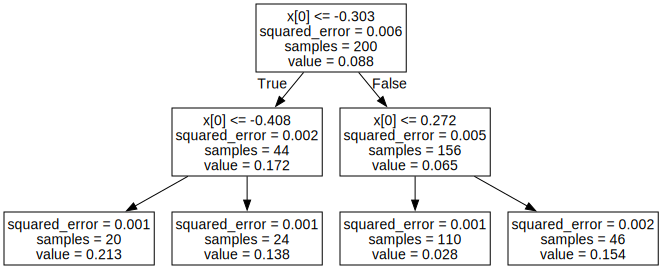

In [37]:
Source.from_file('tree_reg.dot')